In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from numpy.random import permutation
import matplotlib.pyplot as plt

np.random.seed(25)

In [3]:
test = pd.read_csv("data/test.csv")

# normalization
#test = test / 255
print(test.shape)

test = test.values.reshape(-1,28,28,1)
print(test.shape)

(28000, 784)
(28000, 28, 28, 1)


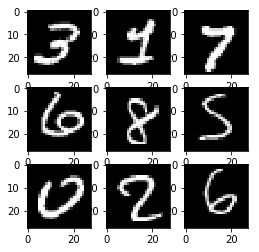

In [4]:
plt.figure(figsize=(4,4))
d_test = np.squeeze(test, axis=3)
shuffles = permutation(d_test)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(shuffles[i], cmap="gray")
del d_test
del shuffles

In [5]:
from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [7]:
layer_utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [8]:
model.load_weights("./cnn2.h5")

In [9]:
results = model.predict_classes(test)
print()
print(results[:5])

27648/28000 [============================>.] - ETA: 0s
[2 0 9 0 3]


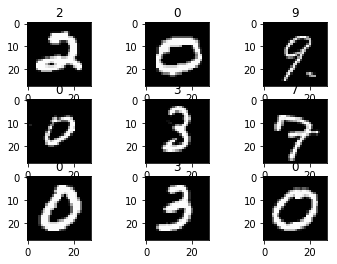

In [10]:
test_set = np.squeeze(test, axis=3)
for idx in range(0, 9):
    plt.subplot(3, 3, idx+1)
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}".format(results[idx]))

In [11]:
results = pd.Series(results,name="Label")
print(results[:5])
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64


In [12]:
from IPython.display import FileLink
FileLink("cnn_mnist_datagen.csv")

/home/paperspace/mnist-cnn/cnn_mnist_datagen.csv